In [1]:
from pathlib import Path

import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

### Define the data folder where the images and simulation data are stored

In [3]:
notebook_dir = Path.cwd()
DATA_FOLDER = notebook_dir / "data"

if not DATA_FOLDER.exists():
    raise ValueError("Data folder with results not found.")
    
IMG_FOLDER = notebook_dir / "img"
IMG_FOLDER.mkdir(parents=True, exist_ok=True)

### Define the parameters of the simulation data

In [4]:
DEVICE_TYPES = ["transmon", "mixed"]
DISTANCES = [3, 5, 7]
MIN_RES_VAR = 1e-3
MAX_RES_VAR = 1e-1

In [8]:
results = []

for device_type in DEVICE_TYPES:
    device_results = []
    num_seeds = 10000 if device_type == "transmon" else 4000
    version = "v2_collision_7_disabled"  if device_type == "transmon" else "v2"
    for dist in DISTANCES:
        da_name = f"{device_type}_device_yield_d_{dist}_resist_{MIN_RES_VAR}_{MAX_RES_VAR}_seeds_{num_seeds}_{version}.nc"
        arr = xr.load_dataarray(DATA_FOLDER/da_name)
        device_results.append(arr)
    
    merged_arr = xr.concat(device_results, dim="distance")
    merged_arr["device_type"] = device_type
    results.append(merged_arr)

collision_arr = xr.concat(results, dim="device_type")

In [10]:
device_yield = collision_arr.mean(dim="seed")

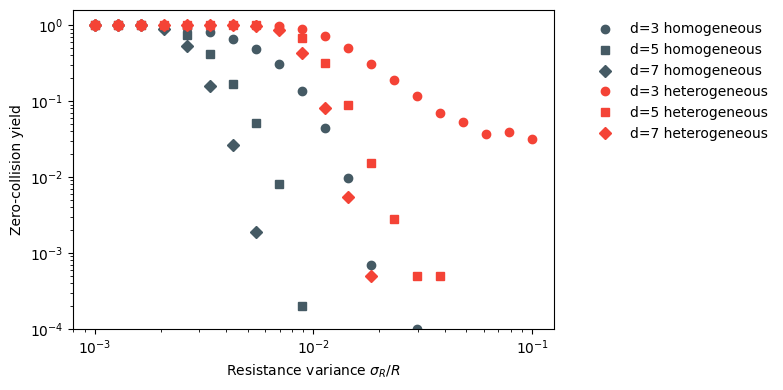

In [90]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

markers = ["o", "s", "D"]
colors = ["#455a64", "#f44336"]

device_types = device_yield.device_type.values
distances = device_yield.distance.values

lines = []
for type_ind, device_type in enumerate(device_types):
    color = colors[type_ind]
    device_lines = []
    for dist_ind, distance in enumerate(distances):
        type_label = "homogeneous" if device_type == "transmon" else "heterogeneous"
        label = f"d={distance} {type_label}"
        marker = markers[dist_ind]
        
        line_plot = ax.plot(
            device_yield.resist_var, 
            device_yield.sel(device_type=device_type, distance=distance),
            marker=marker,
            linestyle="",
            color=color,
            label=label,
            
        )
        device_lines.extend(line_plot)
    lines.append(device_lines)
    
ax.set_xscale("log")
ax.set_xlabel(r"Resistance variance $\sigma_{R}/R$")
ax.set_ylabel(r"Zero-collision yield")
ax.set_yscale("log")
ax.set_ylim(1e-4)
#ax.set_xlim(1e-3, 1e-1)


legend = plt.legend(
    ncol=1, 
    frameon=False,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

fig.tight_layout()
plt.show()

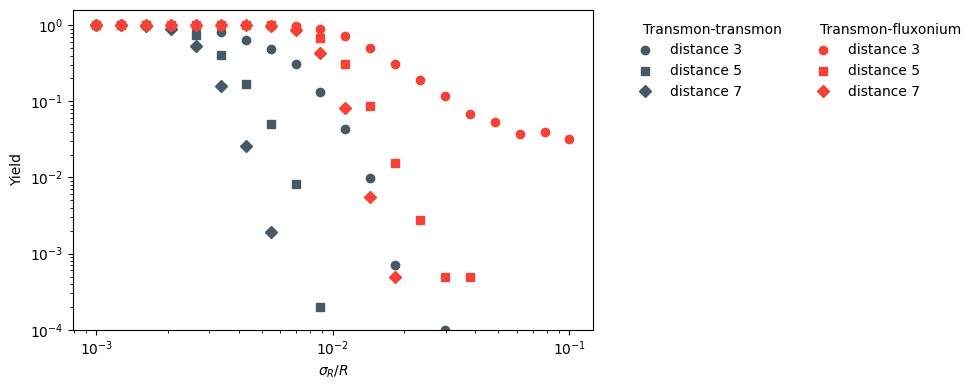

In [79]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

markers = ["o", "s", "D"]
colors = ["#455a64", "#f44336"]

device_types = device_yield.device_type.values
distances = device_yield.distance.values

lines = []
for type_ind, device_type in enumerate(device_types):
    color = colors[type_ind]
    device_lines = []
    for dist_ind, distance in enumerate(distances):
        type_label = "transmon-transmon" if device_type == "transmon" else "transmon-fluxonium"
        label = f"d={distance} {type_label}"
        marker = markers[dist_ind]
        
        line_plot = ax.plot(
            device_yield.resist_var, 
            device_yield.sel(device_type=device_type, distance=distance),
            marker=marker,
            linestyle="",
            color=color,
            label=label,
            
        )
        device_lines.extend(line_plot)
    lines.append(device_lines)
    
ax.set_xscale("log")
ax.set_xlabel(r"$\sigma_{R}/R$")
ax.set_ylabel(r"Yield")
ax.set_yscale("log")
ax.set_ylim(1e-4)
#ax.set_xlim(1e-3, 1e-1)

labels = []
for device_type in device_types:
    title_label = "Transmon-transmon" if device_type == "transmon" else "Transmon-fluxonium"
    labels.append(title_label)
    for distance in distances: 
        marker_label = f"distance {distance}"
        labels.append(marker_label)

h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = ph[:1] + lines[0] + ph[1:] + h[3:]

legend = plt.legend(
    handles, 
    labels, 
    ncol=2, 
    frameon=False,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

for vpack in legend._legend_handle_box.get_children():
    for hpack in vpack.get_children()[:1]:
        hpack.get_children()[0].set_width(0)

fig.tight_layout()
plt.show()

In [59]:
lines[0]

[[<matplotlib.lines.Line2D at 0x11d534640>],

In [61]:
l

['d=3 transmon-transmon',
 'd=5 transmon-transmon',
 'd=7 transmon-transmon',
 'd=3 transmon-fluxonium',
 'd=5 transmon-fluxonium',
 'd=7 transmon-fluxonium']